In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns  
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
x_train = pd.read_csv('X_train.csv', sep=',', index_col=0)
y_train = pd.read_csv('y_train.csv', sep=',', index_col=0)
df = x_train.join(y_train)
pd.set_option('display.max_colwidth', None)

In [3]:
# Utilisez la méthode 'fillna' pour remplir les valeurs manquantes dans 'description' avec 'designation'
df['description'].fillna(df['designation'], inplace=True)

In [4]:
# Assurez-vous d'avoir téléchargé les données nécessaires pour NLTK
nltk.download('punkt')

# Définissez une fonction pour tokeniser une chaîne de caractères
def tokenize_text(text):
    return word_tokenize(text)

# Appliquez la fonction de tokenisation à la colonne "description" de votre DataFrame "df"
df['description'] = df['description'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /home/touazi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
balises = df['description'].apply(lambda x: re.findall(r'<.*?>', str(x)))
print(balises.explode().unique())

[nan "<', 'br', '>"
 '<\', \'span\', \'class=\', "\'\'", \'vga_style2\', "\'\'", \'>'
 "<', 'b', '>" "<', '/b', '>" "<', 'strong', '>" "<', '/strong', '>"
 "<', 'ul', '>" "<', 'li', '>" "<', '/li', '>" "<', '/ul', '>"
 "<', 'br', '/', '>" "<', 'p', '>" "<', '/p', '>" "<', 'i', '>"
 "<', '/i', '>"
 '<\', \'span\', \'id=\', "\'\'", \'result_box\', "\'\'", \'lang=\', "\'\'", \'en\', "\'\'", \'tabindex=\', "\'\'", \'-1\', "\'\'", \'>'
 '<\', \'span\', \'class=\', "\'\'", \'hps\', "\'\'", \'>'
 "<', '/span', '>"
 '<\', \'span\', \'class=\', "\'\'", \'hps\', \'atn\', "\'\'", \'>'
 "<', 'span', '>"
 "<', 'p', 'align=', '&', 'quot', ';', 'justify', '&', 'quot', ';', '>"
 "<', 'h4', '>" "<', '/h4', '>"
 '<\', \'iframe\', \'allowfullscreen=\', "\'\'", "\'\'", \'frameborder=\', "\'\'", \'0\', "\'\'", \'height=\', "\'\'", \'315\', "\'\'", \'src=\', "\'\'", \'https\', \':\', \'//www.youtube.com/embed/Iahzt0BEBhw\', "\'\'", \'width=\', "\'\'", \'560\', "\'\'", \'>'
 "<', '/iframe', '>" "<', 'div', '

In [6]:
# Supprimer les balises HTML de la colonne 'description'
import pandas as pd
import re
df['description'] = df['description'].apply(lambda x: re.sub(r'<(?!img|b|bold|strong|a|iframe|object).*?>', '', str(x)))

# Afficher le DataFrame mis à jour
df.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,"['Olivia', ':', 'Personalisiertes', 'Notizbuch', '/', '150', 'Seiten', '/', 'Punktraster', '/', 'Ca', 'Din', 'A5', '/', 'Rosen-Design']",3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,"['Journal', 'Des', 'Arts', '(', 'Le', ')', 'N°', '133', 'Du', '28/09/2001', '-', ""L'art"", 'Et', 'Son', 'Marche', 'Salon', ""D'art"", 'Asiatique', 'A', 'Paris', '-', 'Jacques', 'Barrere', '-', 'Francois', 'Perrier', '-', 'La', 'Reforme', 'Des', 'Ventes', 'Aux', 'Encheres', 'Publiques', '-', 'Le', 'Sna', 'Fete', 'Ses', 'Cent', 'Ans', '.']",436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,"['PILOT', 'STYLE', 'Touch', 'Pen', 'de', 'marque', 'Speedlink', 'est', '1', 'stylet', 'ergonomique', 'pour', 'GamePad', 'Nintendo', 'Wii', 'U.', '', 'Pour', 'un', 'confort', 'optimal', 'et', 'une', 'précision', 'maximale', 'sur', 'le', 'GamePad', 'de', 'la', 'Wii', 'U', ':', 'ce', 'grand', 'stylet', 'hautement', 'ergonomique', 'est', 'non', 'seulement', 'parfaitement', 'adapté', 'à', 'votre', 'main', 'mais', 'aussi', 'très', 'élégant.', '', 'Il', 'est', 'livré', 'avec', 'un', 'support', 'qui', 'se', 'fixe', 'sans', 'adhésif', 'à', ""l'arrière"", 'du', 'GamePad', '', '', 'Caractéristiques', ':', '', 'Modèle', ':', 'Speedlink', 'PILOT', 'STYLE', 'Touch', 'Pen', '', 'Couleur', ':', 'Bleu', '', 'Ref', '.', 'Fabricant', ':', 'SL-3468-BE', '', 'Compatibilité', ':', 'GamePad', 'Nintendo', 'Wii', 'U', '', 'Forme', 'particulièrement', 'ergonomique', 'excellente', 'tenue', 'en', 'main', '', 'Pointe', 'à', 'revêtement', 'longue', 'durée', 'conçue', 'pour', 'ne', 'pas', 'abîmer', ""l'écran"", 'tactile', '', 'En', 'bonus', ':', 'Support', 'inclu', 'pour', 'GamePad', '', '', '', '', '']",201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),"['Peluche', 'Donald', '-', 'Europe', '-', 'Disneyland', '2000', '(', 'Marionnette', 'À', 'Doigt', ')']",50418756,457047496,1280
4,La Guerre Des Tuques,"['Luc', 'a', 'des', 'id', '&', 'eacute', ';', 'es', 'de', 'grandeur', '.', 'Il', 'veut', 'organiser', 'un', 'jeu', 'de', 'guerre', 'de', 'boules', 'de', 'neige', 'et', ""s'arranger"", 'pour', 'en', '&', 'ecirc', ';', 'tre', 'le', 'vainqueur', 'incontest', '&', 'eacute', ';', '.', 'Mais', 'Sophie', ""s'en"", 'm', '&', 'ecirc', ';', 'le', 'et', 'chambarde', 'tous', 'ses', 'plans', '...']",278535884,1077757786,2705


In [7]:
# Convertir la colonne 'description' en minuscules
df['description'] = df['description'].str.lower()

In [8]:
# Appliquer la suppression de la ponctuation à la colonne 'description'
df['description'] = df['description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [9]:
# Définissez une fonction pour supprimer les caractères spéciaux
def remove_special_characters(text):
    # Utilisez une expression régulière pour supprimer les caractères spéciaux
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

# Appliquez la fonction de suppression de caractères spéciaux à la colonne "description" de votre DataFrame "df"
df['description'] = df['description'].apply(remove_special_characters)

In [10]:
# Créez un lemmatizer
lemmatizer = WordNetLemmatizer()

# Définissez une fonction pour la lemmatisation
def lemmatize_text(text):
    words = text.split()  # Divisez le texte en mots
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatisez chaque mot
    lemmatized_text = ' '.join(lemmatized_words)  # Rejoignez les mots en un texte
    return lemmatized_text

# Appliquez la fonction de lemmatisation à la colonne "description" de votre DataFrame "df"
df['description'] = df['description'].apply(lemmatize_text)

In [11]:
# Assurez-vous d'avoir téléchargé les mots vides pour le français
nltk.download('stopwords')

from nltk.corpus import stopwords

# Chargez la liste des mots vides en français
stop_words = set(stopwords.words('french'))

# Définissez une fonction pour supprimer les mots vides
def remove_stopwords(text):
    words = text.split()  # Divisez le texte en mots
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Supprimez les mots vides
    filtered_text = ' '.join(filtered_words)  # Rejoignez les mots restants en un texte
    return filtered_text

# Appliquez la fonction de suppression de mots vides à la colonne "description" de votre DataFrame "df"
df['description'] = df['description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /home/touazi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Supprimez les doublons de la colonne 'description' de votre DataFrame 'df'
df.drop_duplicates(subset=['description'], inplace=True)

# Réindexez le DataFrame si nécessaire
df.reset_index(drop=True, inplace=True)

df.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,olivia personalisiertes notizbuch 150 seiten punktraster ca din a5 rosendesign,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,journal art 133 28092001 lart marche salon dart asiatique a paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent an,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,pilot style touch pen marque speedlink 1 stylet ergonomique gamepad nintendo wii u confort optimal prcision maximale gamepad wii u grand stylet hautement ergonomique non seulement parfaitement adapt main aussi trs lgant livr support fixe sans adhsif larrire gamepad caractristiques modle speedlink pilot style touch pen couleur bleu ref fabricant sl3468be compatibilit gamepad nintendo wii u forme particulirement ergonomique excellente tenue main pointe revtement longue dure conue pa abmer lcran tactile bonus support inclu gamepad,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),peluche donald europe disneyland 2000 marionnette doigt,50418756,457047496,1280
4,La Guerre Des Tuques,luc a id eacute e grandeur veut organiser jeu guerre boule neige sarranger ecirc tre vainqueur incontest eacute sophie sen ecirc chambarde tous plan,278535884,1077757786,2705


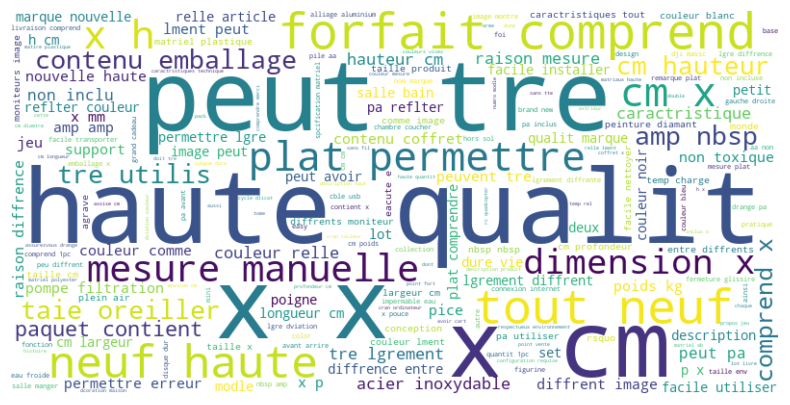

In [13]:
all_descriptions = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();